<a href="https://colab.research.google.com/github/priba/kornia-examples/blob/master/filter_blurring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Filtering Operations

In this tutorial you are going to learn how to use the different filtering operations found in `kornia.filters`.

## Install Kornia

In [4]:
#!pip install git+https://github.com/arraiyopensource/kornia

import kornia
print(f"Kornia version: {kornia.__version__}")

Kornia version: 0.2.0+cb9373b


Load the image using OpenCV and plot it

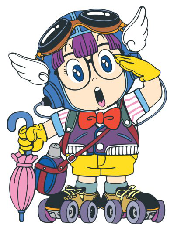

In [5]:
from matplotlib import pyplot as plt
import cv2
import numpy as np

# load using opencv and convert to RGB
img_bgr: np.array = cv2.imread('data/filter/drslump.jpg', cv2.IMREAD_COLOR)
img_rgb: np.array = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb); plt.axis('off');

Create a batch of 4 identical images and normalize it between [0,1]

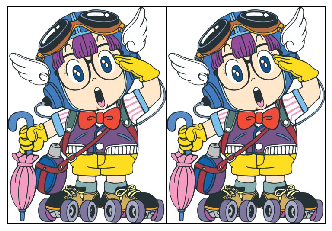

In [8]:
import torch
import torchvision

def imshow(input: torch.Tensor):
    out: torch.Tensor = torchvision.utils.make_grid(input, nrow=2)
    out_np: np.array = kornia.tensor_to_image(out)
    plt.imshow(out_np); plt.axis('off');

# stack four identical images
data: torch.Tensor = kornia.image_to_tensor(img_rgb)  # 1xCxHxW
data = data.expand(2, -1, -1, -1)  # 2xCxHxW

# normalize
data = kornia.normalize(data.float(), 0., 255.)

# plot
imshow(data)

## Apply a blurring filter

### Box Blur

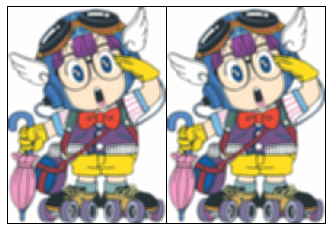

In [9]:
# Box Blur
x_blur: torch.Tensor = kornia.box_blur(data, (9, 9))
imshow(x_blur)

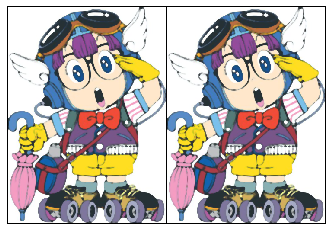

In [10]:
# Media Blur
x_blur: torch.Tensor = kornia.median_blur(data, (5, 5))
imshow(x_blur)

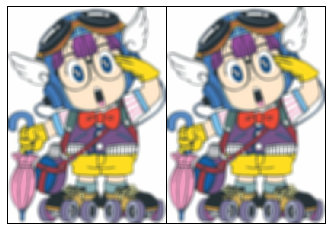

In [11]:
# Gaussian Blur
x_blur: torch.Tensor = kornia.gaussian_blur2d(data, (11, 11), (11., 11.))
imshow(x_blur)